In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


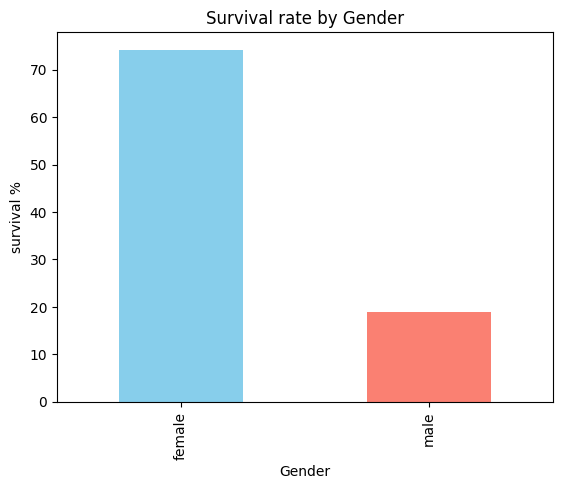

In [103]:
#Plot survival rate by gender as a bar chart

survival_rate = data.groupby("Sex")["Survived"].mean()*100
survival_rate.plot(kind="bar",color= ('Skyblue','salmon'))
plt.title("Survival rate by Gender")
plt.ylabel("survival %")
plt.xlabel("Gender")

#plt.xticks(rotation=0)
#plt.ylim(0, 100)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

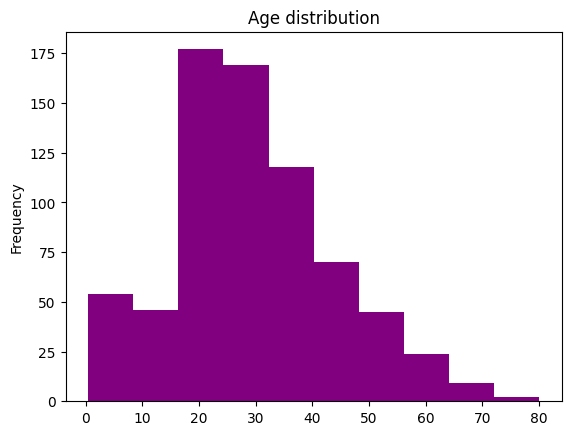

In [27]:
# Plot a histogram of the Age distribution.

age_distribution = data["Age"]
age_distribution.plot(kind="hist",color = "purple")
plt.title("Age distribution")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

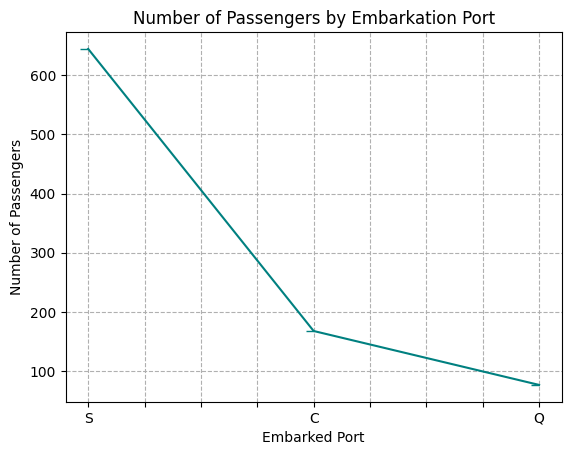

In [37]:
#Plot count of passengers by Embarkation Port (Embarked).

passengers = data["Embarked"].value_counts()
passengers.plot(marker=0,color="teal")
plt.title("Number of Passengers by Embarkation Port")
plt.xlabel("Embarked Port")
plt.ylabel("Number of Passengers")
plt.grid(True, linestyle='--')
plt.show

In [38]:
#Who had the largest family name on board?
data["Name"].max()

'van Melkebeke, Mr. Philemon'

In [46]:
#What’s the survival rate among passengers who paid more than 100

survival_rate =data[data["Fare"]>100]
paid= survival_rate["Survived"].mean()*100
paid

np.float64(73.58490566037736)

In [62]:
#Find the most common female name prefix (Miss., Mrs., etc.)
prefix = data[data["Sex"] == "female"]["Name"]
title = prefix.str.extract(r',\s*(Mrs\.|Miss\.|Miss\.|Ms\.|Mme\.|Mlle\.)')
title_counts = title[0].value_counts()
most_common_prefix = title_counts.idxmax()   #give the title with the highest count
title_counts_max = title_counts.max()
title_counts_max

print(f"The most common female name prefix is '{most_common_prefix}' used by {title_counts_max} passengers.")


The most common female name prefix is 'Miss.' used by 182 passengers.


In [63]:
#What was the average age of survivors vs non-survivors?

avg_age = data.groupby("Survived")["Age"].mean()
avg_age

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

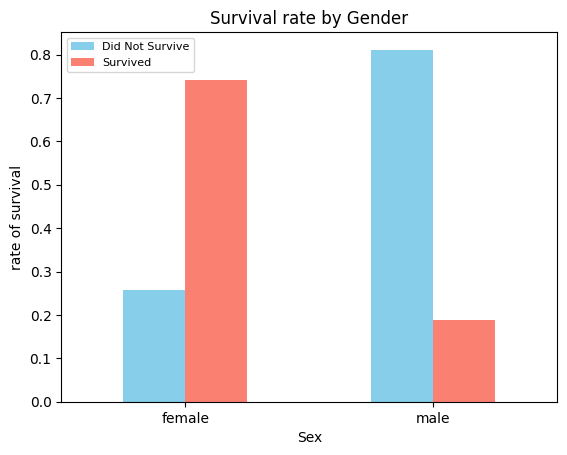

In [75]:
#Compare survival rate by gender
compare= data.groupby("Sex")["Survived"].value_counts(normalize=True).unstack()   #normalize=True: gets percentage instead of count.
                      #.unstack(): makes the result into a table with rows as gender and columns as survival status.

compare.plot(kind="bar",color=('Skyblue','salmon'))
plt.title("Survival rate by Gender")
plt.ylabel("rate of survival")
plt.legend(["Did Not Survive", "Survived"],fontsize =8)
plt.xticks(rotation=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

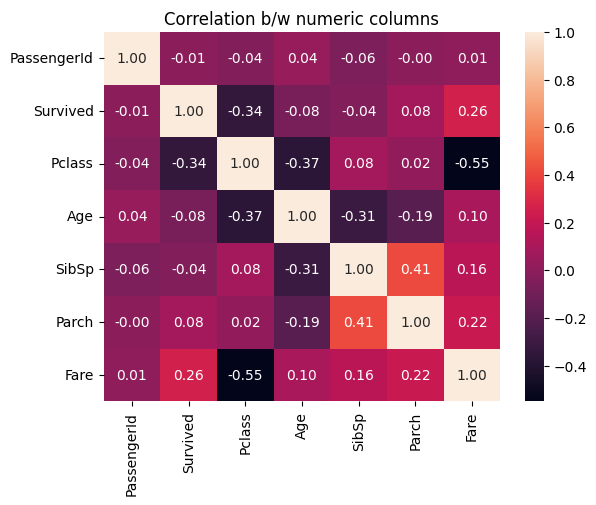

In [89]:
#Find the correlation between numeric columns.and plot with heatmap

correlation = data.corr(numeric_only = True)
sns.heatmap(correlation,annot=True, fmt=".2f")   #annot give no. data
plt.title("Correlation b/w numeric columns")

plt.show

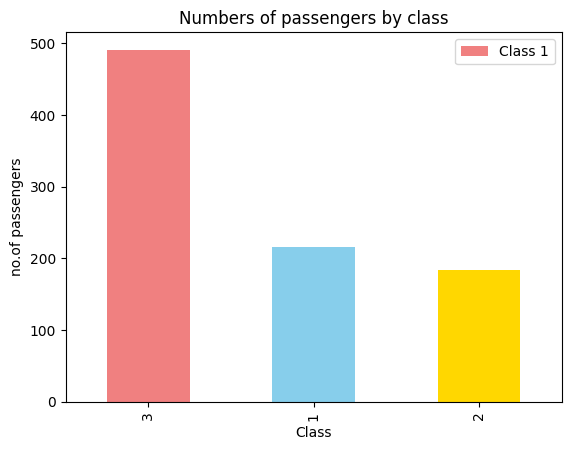

In [100]:
#Create a bar chart showing the number of passengers by class.

passengers = data["Pclass"].value_counts()
passengers.plot(kind="bar", color = ["lightcoral","skyblue","#FFD700"])
plt.title("Numbers of passengers by class" )
plt.xlabel("Class")
plt.ylabel("no.of passengers")
plt.legend(["Class 1" , "Class 2" , "Class 3"])  #it shows only one legend because we take single series/row data .for different legent we should use patches
plt.show()

In [113]:
#Who were the youngest and oldest passengers?
young =  data.loc[data["Age"].idxmin(),["Name","Age","Survived"]]     #data.loc[...] retrieves the full row for that index.
old = data.loc[data["Age"].idxmax(),["Name","Age","Survived"]]

print("Youngest Passenger:\n", young)
print("\nOldest Passenger:\n", old)

Youngest Passenger:
 Name        Thomas, Master. Assad Alexander
Age                                    0.42
Survived                                  1
Name: 803, dtype: object

Oldest Passenger:
 Name        Barkworth, Mr. Algernon Henry Wilson
Age                                         80.0
Survived                                       1
Name: 630, dtype: object
